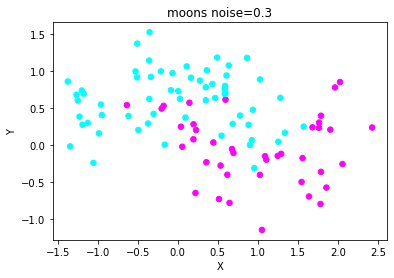

LogisticRegression 0.75
SVC 0.75
DecisionTreeClassifier 0.75
KNeighborsClassifier 0.75
VotingClassifier 0.8
[[0.6235 0.3765 0.5443 0.4557 0.     1.     0.5    0.5   ]
 [0.3028 0.6972 0.1961 0.8039 0.     1.     0.3    0.7   ]
 [0.9189 0.0811 0.9036 0.0964 1.     0.     1.     0.    ]
 [0.2141 0.7859 0.0736 0.9264 0.     1.     0.1    0.9   ]
 [0.8552 0.1448 0.8838 0.1162 0.     1.     0.7    0.3   ]
 [0.8807 0.1193 0.9224 0.0776 1.     0.     0.9    0.1   ]
 [0.3785 0.6215 0.189  0.811  0.     1.     0.3    0.7   ]
 [0.5438 0.4562 0.5231 0.4769 1.     0.     0.3    0.7   ]
 [0.3334 0.6666 0.2901 0.7099 0.     1.     0.3    0.7   ]
 [0.259  0.741  0.2519 0.7481 0.     1.     0.5    0.5   ]
 [0.8576 0.1424 0.8849 0.1151 1.     0.     1.     0.    ]
 [0.8383 0.1617 0.9137 0.0863 1.     0.     1.     0.    ]
 [0.7936 0.2064 0.8751 0.1249 0.     1.     0.9    0.1   ]
 [0.0652 0.9348 0.1119 0.8881 0.     1.     0.1    0.9   ]
 [0.8825 0.1175 0.9198 0.0802 1.     0.     0.8    0.2   ]
 [0.711

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
# 构造一个用于演示的交错半圆数据集
moons = make_moons(n_samples=(60, 40), noise=0.3, random_state=5)
data = moons[0]
target = moons[1]
# 双月数据集可视化
plt.scatter(data[:, 0], data[:, 1], c=target, s=30, cmap="cool")
plt.xlabel('X')
plt.ylabel('Y')
plt.title("moons noise=0.3")
plt.show()
# 划分训练集测试集
X_train, X_test, Y_train, Y_test = train_test_split(
  data, 
  target, 
  test_size=0.2,
  random_state=1
)

log_clf = LogisticRegression()
svc_clf = SVC(probability=True)
tree_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier(n_neighbors=10)

vote_clf = VotingClassifier(
    estimators=[("log_clf", log_clf), ("svc_clf", svc_clf), ("tree_clf", tree_clf), ("knn_clf", knn_clf)],
    voting="soft",
)

for clf in (log_clf, svc_clf, tree_clf, knn_clf, vote_clf):
    clf.fit(X_train, Y_train)
    print(clf.__class__.__name__, clf.score(X_test, Y_test))

print(np.round(vote_clf.transform(X_test), 4))